This code implements the training and evaluation of a neural network for image classification using the CIFAR-10 dataset. Starting with the utilization of a pre-trained VGG16 model for feature extraction, the code involves building and training a model with added fully connected layers, evaluating its performance on test data, and unfreezing the top layers of VGG16 for further training. It then includes the construction of a modified model with some unfrozen top layers, training this model, and evaluating its effectiveness. The code also involves saving the trained model and visualizing training results using plots.

In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import cifar10

from sklearn.metrics import classification_report

In [ ]:
# Verify the version
print('Packages version: \n')
print(tf.__name__, tf.__version__)
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)

Packages version: 

tensorflow 2.15.0
numpy 1.25.2
pandas 1.5.3


In [ ]:
# Presettings

num_classes = 10
filepath = "weights.h5"
batch_size = 128
epochs = 50

In [ ]:
# Loading the dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Shape cheecing

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# Defining array. Each item of array represent integer value of labels. 10 item for 10 integer label
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

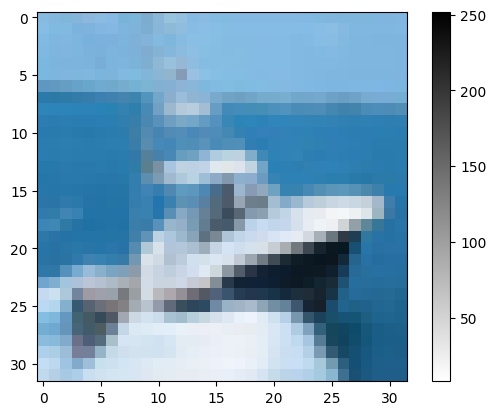

Class ID: [8] and Class name: Ship


In [ ]:
# Inspect the data in the array
index = 8
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.colorbar()
plt.show()
print(f'Class ID: {y_train[index]} and Class name: {class_names[y_train[index][0]]}')

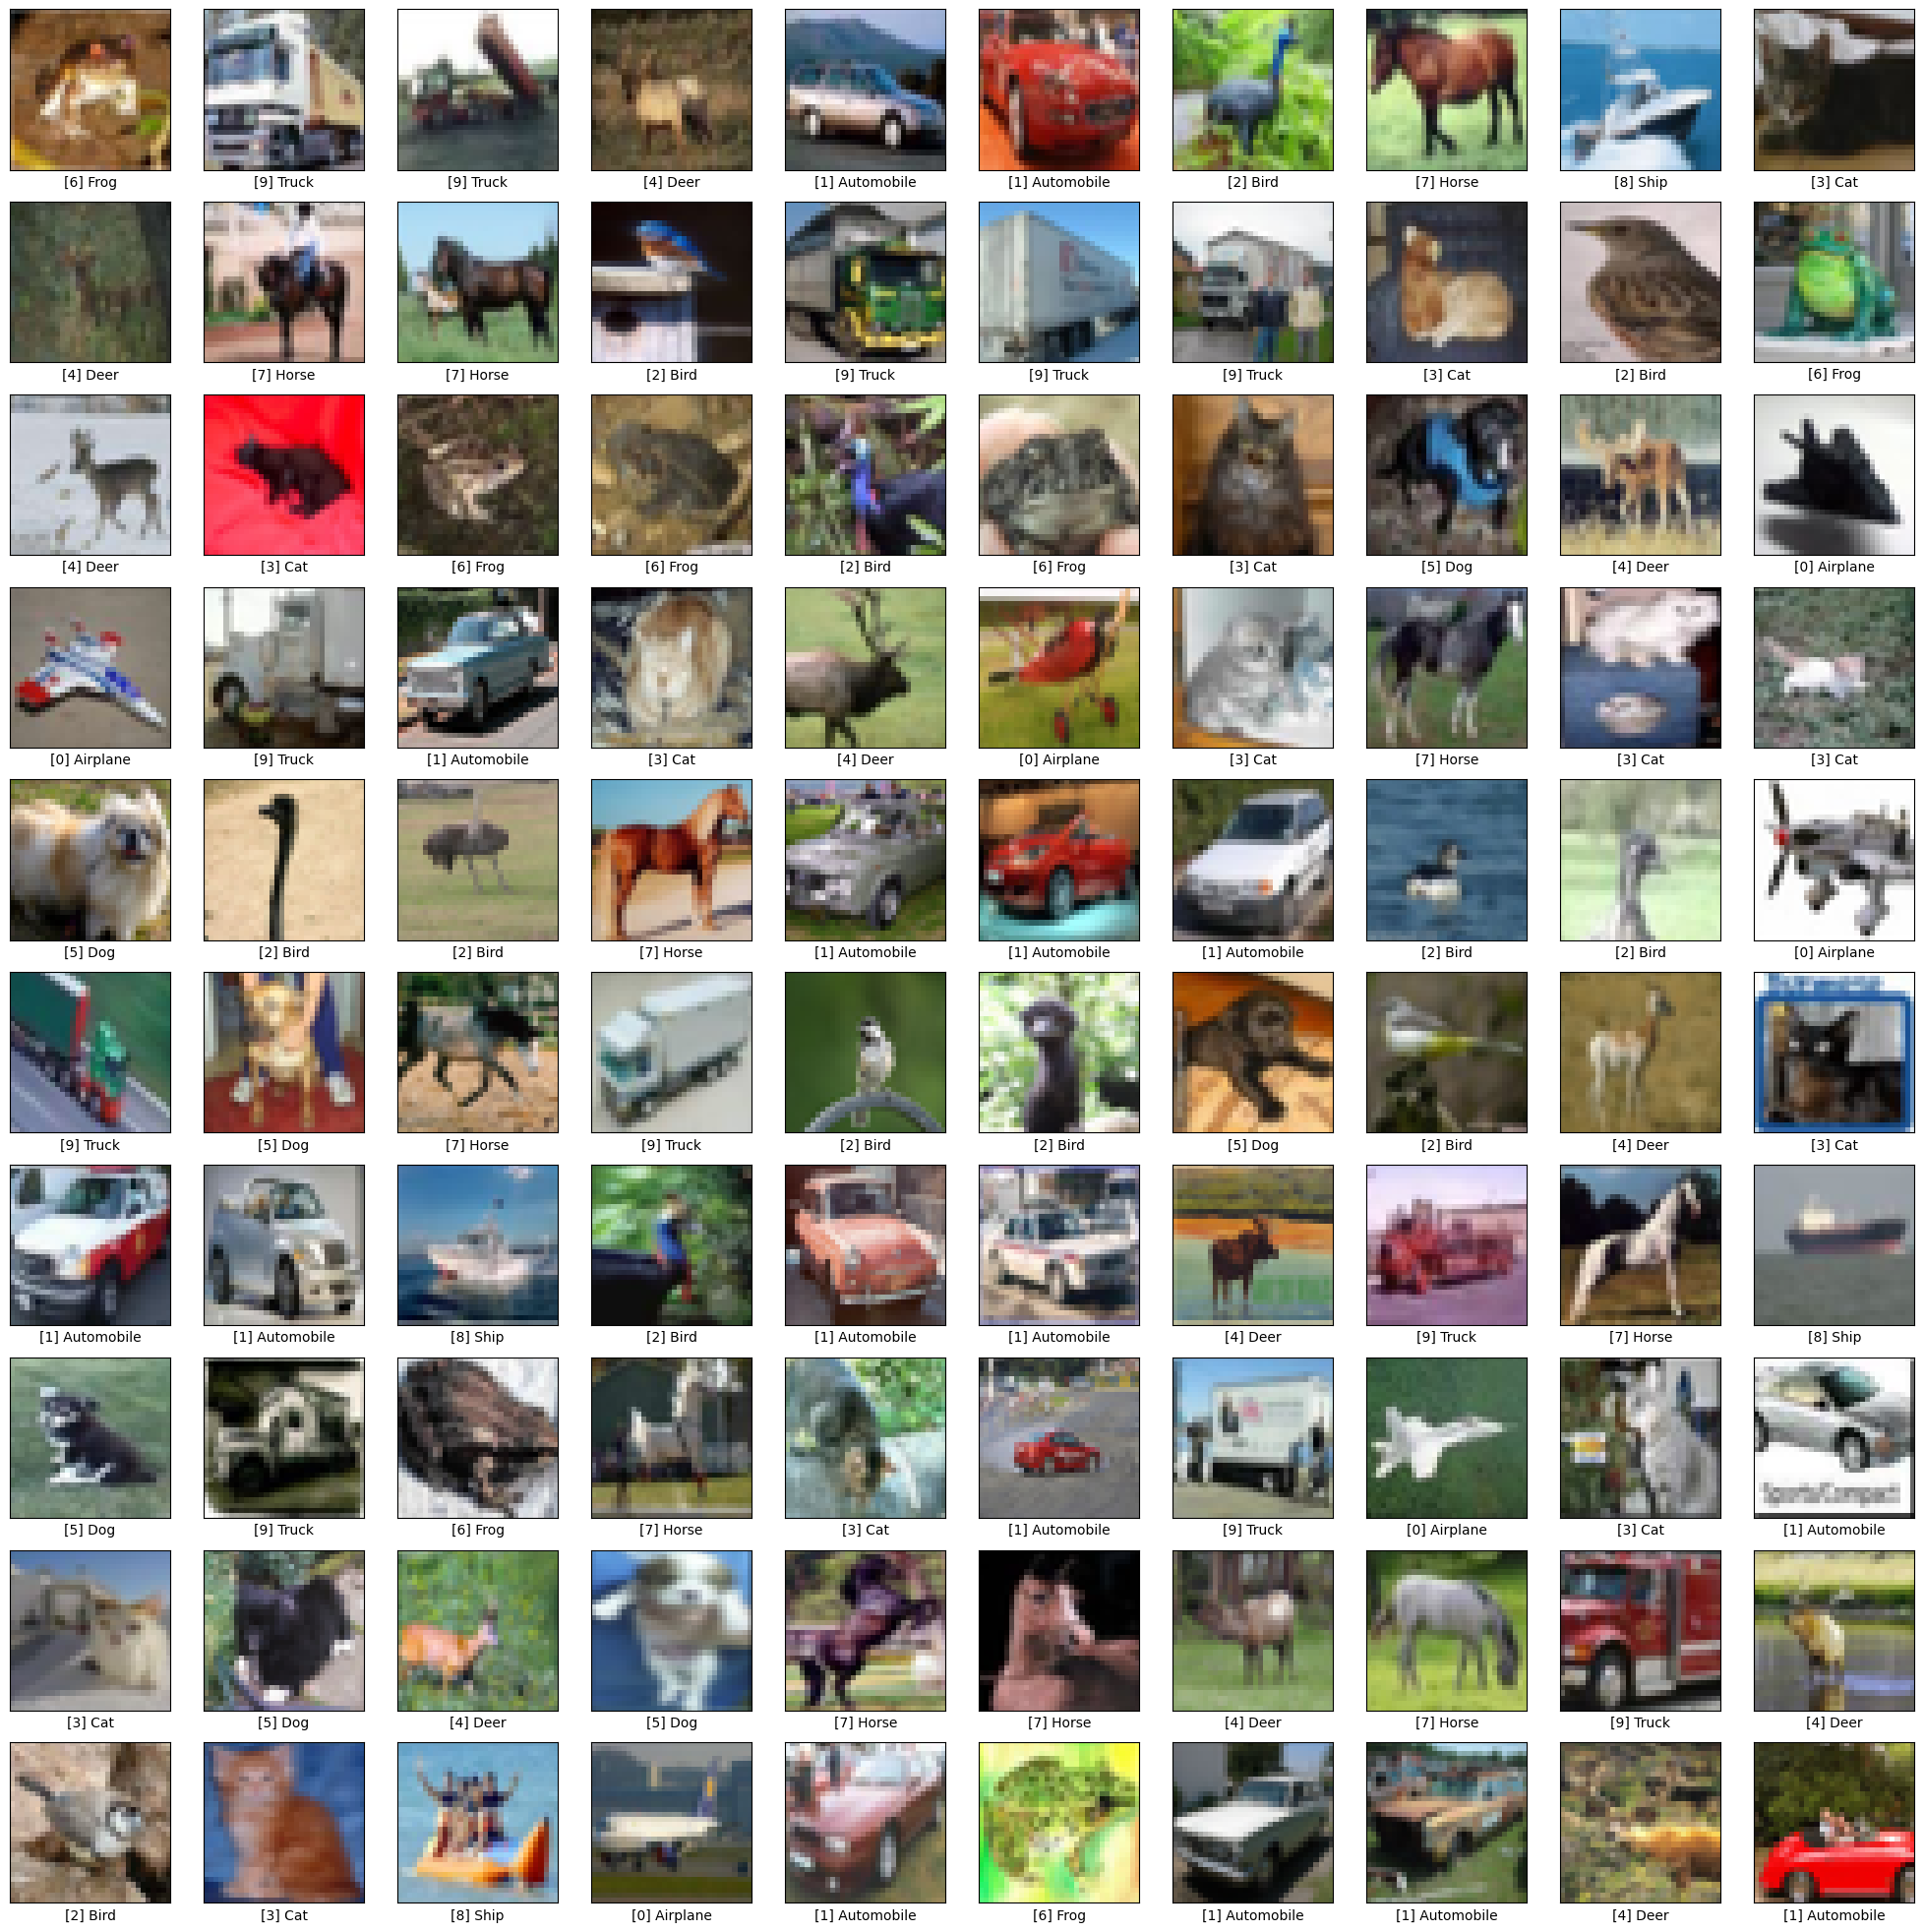

In [ ]:
# Display the first 25 images from traing set
plt.figure(figsize=(25, 25))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(f'{y_train[i]} {class_names[y_train[i][0]]}')
plt.show()

In [ ]:
# Normalization of data and transformation of labels into categorical ones. Pixel value of the image falls between 0 to 255

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# One hot encoding of the labels

y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)

In [ ]:
# Define the Convolutional Neural Network

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))



In [ ]:
# Model creation
model = Sequential()
model.add(conv_base)  # Додавання попередньо навченої моделі

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

conv_base.trainable = False

In [ ]:
# Summary model
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)              

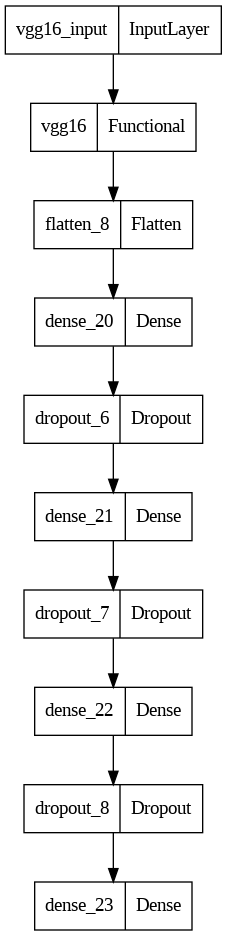

In [ ]:
# Plot model graph
plot_model(model, 'model.png')

In [ ]:
# Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
# Training model

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

# Unfreeze all layers of the previously trained VGG16 model
conv_base.trainable = True

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Retraining the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

# Evaluation of the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Obtaining model predictions on test data
y_pred = model.predict(x_test)

# Classification report
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(report)

Epoch 1/50
391/391 [==============================] - 6s 12ms/step - loss: 2.2633 - accuracy: 0.1646 - val_loss: 1.9932 - val_accuracy: 0.3427
Epoch 2/50
391/391 [==============================] - 4s 10ms/step - loss: 1.9505 - accuracy: 0.2968 - val_loss: 1.6628 - val_accuracy: 0.4413
Epoch 3/50
391/391 [==============================] - 4s 10ms/step - loss: 1.7490 - accuracy: 0.3771 - val_loss: 1.5222 - val_accuracy: 0.4847
Epoch 4/50
391/391 [==============================] - 4s 10ms/step - loss: 1.6433 - accuracy: 0.4190 - val_loss: 1.4427 - val_accuracy: 0.5019
Epoch 5/50
391/391 [==============================] - 4s 11ms/step - loss: 1.5698 - accuracy: 0.4482 - val_loss: 1.3966 - val_accuracy: 0.5207
Epoch 6/50
391/391 [==============================] - 4s 10ms/step - loss: 1.5218 - accuracy: 0.4701 - val_loss: 1.3523 - val_accuracy: 0.5290
Epoch 7/50
391/391 [==============================] - 4s 10ms/step - loss: 1.4735 - accuracy: 0.4888 - val_loss: 1.3220 - val_accuracy: 0.5413

The model retraining process, conceptualized by Andrew Chychur, involves:

*  Unfreezing Layers: Selected layers of the pre-trained VGG16 model are unfrozen.
*   Creating a Modified Model: A new model is constructed by adding additional layers on top of the unfrozen VGG16 base.
*  Compiling the Model: The modified model is compiled with appropriate optimizer, loss function, and metrics.
*  Training the Model: The modified model is trained on the CIFAR-10 dataset.
*  Evaluation: The model's performance is evaluated on the test dataset.

This process fine-tunes the pre-trained VGG16 model on CIFAR-10, aiming to enhance its performance for the specific task.


In [ ]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

conv_base.trainable = True


layer_list = ["block4_conv1", "block5_conv1"]
for layer in conv_base.layers:
    if layer.name in layer_list:
        set_trainable = True
    else:
        layer.trainable = False


modified_model = Sequential([
   model,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

# Compile and training model
modified_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history = modified_model.fit(
    x_train, y_train, epochs=50, verbose=1, batch_size=128, validation_split=0.2
)

# Отримання передбачень моделі на тестових даних
y_pred_m = modified_model.predict(x_test)
# Отримання класифікаційного звіту
report = classification_report(y_test.argmax(axis=1), y_pred_m.argmax(axis=1))
print(report)

Epoch 1/50
313/313 [==============================] - 13s 25ms/step - loss: 2.0309 - accuracy: 0.4480 - val_loss: 1.8232 - val_accuracy: 0.4417
Epoch 2/50
313/313 [==============================] - 7s 22ms/step - loss: 1.5831 - accuracy: 0.4671 - val_loss: 1.4141 - val_accuracy: 0.4658
Epoch 3/50
313/313 [==============================] - 7s 23ms/step - loss: 1.2788 - accuracy: 0.4641 - val_loss: 1.1297 - val_accuracy: 0.4813
Epoch 4/50
313/313 [==============================] - 7s 23ms/step - loss: 1.0228 - accuracy: 0.4899 - val_loss: 0.9627 - val_accuracy: 0.4920
Epoch 5/50
313/313 [==============================] - 7s 23ms/step - loss: 0.9233 - accuracy: 0.4922 - val_loss: 0.8844 - val_accuracy: 0.5001
Epoch 6/50
313/313 [==============================] - 7s 23ms/step - loss: 0.8684 - accuracy: 0.4968 - val_loss: 0.8677 - val_accuracy: 0.5105
Epoch 7/50
313/313 [==============================] - 7s 23ms/step - loss: 0.8448 - accuracy: 0.5424 - val_loss: 0.8156 - val_accuracy: 0.631

In [ ]:
# Save model
model.save("weights-cifar10.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 5ms/step


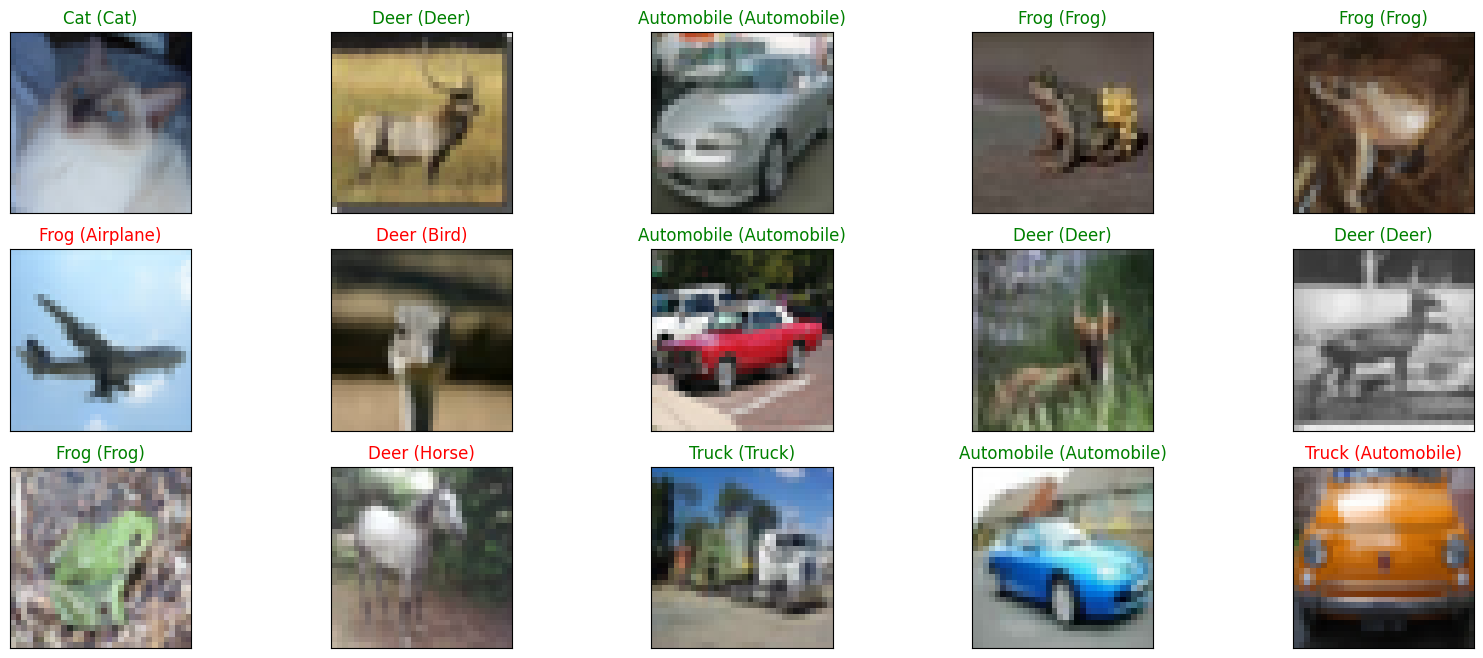

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])

    true_index = np.argmax(y_test[index].astype(int))
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

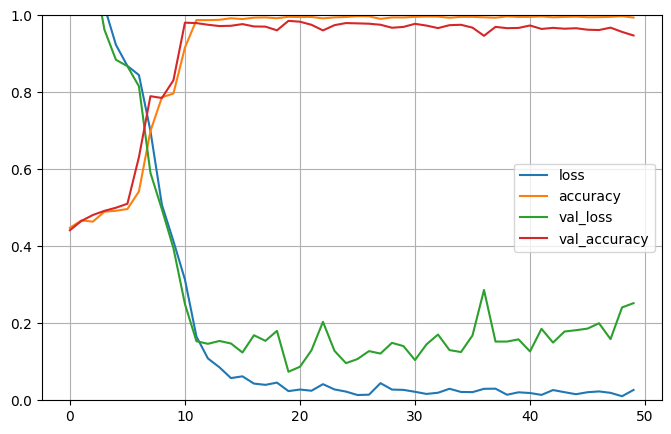

In [ ]:
# Plot results
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Show results
results = modified_model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 2s 7ms/step - loss: 0.9410 - accuracy: 0.8482
[0.9409654140472412, 0.8482000231742859]
